In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.feature_selection import f_classif, mutual_info_regression
from sklearn.preprocessing import LabelEncoder


In [2]:
df = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

In [3]:
df

,row_id,date,country,store,product,num_sold
0,0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329
1,1,2015-01-01,Finland,KaggleMart,Kaggle Hat,520
2,2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,146
3,3,2015-01-01,Finland,KaggleRama,Kaggle Mug,572
4,4,2015-01-01,Finland,KaggleRama,Kaggle Hat,911
...,...,...,...,...,...,...
26293,26293,2018-12-31,Sweden,KaggleMart,Kaggle Hat,823
26294,26294,2018-12-31,Sweden,KaggleMart,Kaggle Sticker,250
26295,26295,2018-12-31,Sweden,KaggleRama,Kaggle Mug,1004
26296,26296,2018-12-31,Sweden,KaggleRama,Kaggle Hat,1441


# Feature Engineering

In [4]:
def get_year_day(x):
    
    if (x.is_leap_year) & (x >= dt.datetime(x.year, 4, 29)):
        
        return x.dayofyear - 1
    else:
        return x.dayofyear

In [5]:
def get_features(df):
    df['date'] = pd.to_datetime(df['date'])
    df['day of week'] = df['date'].dt.day_name()
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['day of year'] = df['date'].apply(lambda x: get_year_day(x))
    df = pd.get_dummies(df_test, columns=['country', 'store', 'product', 'day of week'])
    
    return df

In [6]:
df['date'] = pd.to_datetime(df['date'])

In [7]:
df['day of week'] = df['date'].dt.day_name()
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

In [8]:
df['day of year'] = df['date'].apply(lambda x: get_year_day(x))

In [9]:
len(df.index)

26298

In [10]:
df = df[df['date'] != dt.datetime(2016, 4, 29)]

In [11]:
len(df.index)

26280

In [12]:
df['day of year'].value_counts()

351    72
356    72
21     72
37     72
53     72
       ..
250    72
266    72
282    72
298    72
16     72
Name: day of year, Length: 365, dtype: int64

# Analysis

In [13]:
def get_classif(independent, dependent):
    
    dep_array = dependent.array
    
    le = LabelEncoder()
    le.fit(independent)
    temp_encode = le.transform(independent).reshape(-1,1)
    f_val, p_val = f_classif(temp_encode[0:199], dep_array[0:199])
    
    return f_val, p_val
    

In [14]:
def get_mi_reg(independent, dependent):
    
    dep_array = dependent.array
    
    le = LabelEncoder()
    le.fit(independent)
    temp_encode = le.transform(independent).reshape(-1,1)
    p_val = mutual_info_regression(temp_encode, dep_array)
    
    return p_val

In [15]:
df['product'].value_counts()

Kaggle Mug        8760
Kaggle Sticker    8760
Kaggle Hat        8760
Name: product, dtype: int64

/Users/marcwork/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='date', ylabel='num_sold'>

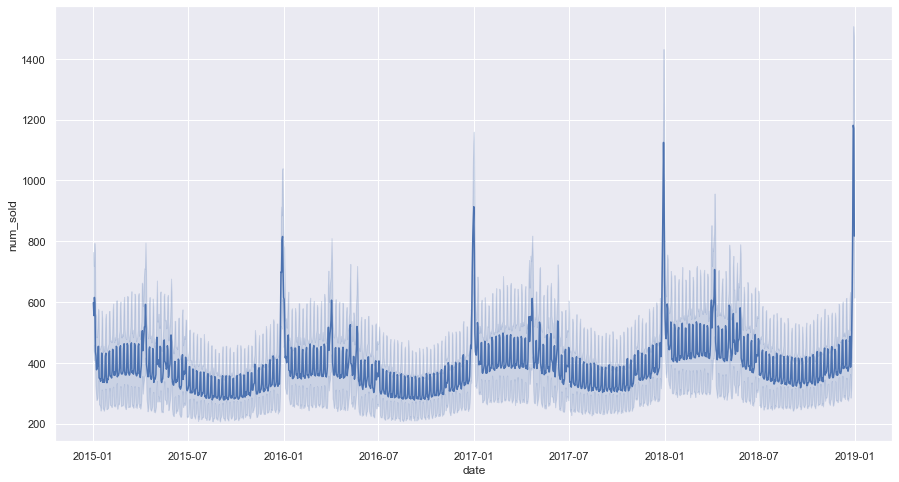

In [16]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.lineplot(df['date'], df['num_sold'])

/Users/marcwork/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='num_sold', ylabel='Density'>

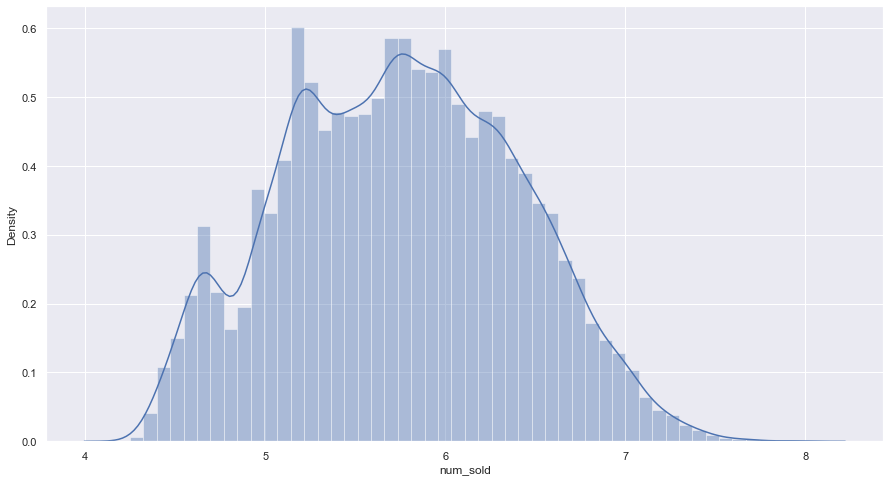

In [17]:
sns.distplot(np.log(df['num_sold']))

/Users/marcwork/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='day of year', ylabel='num_sold'>

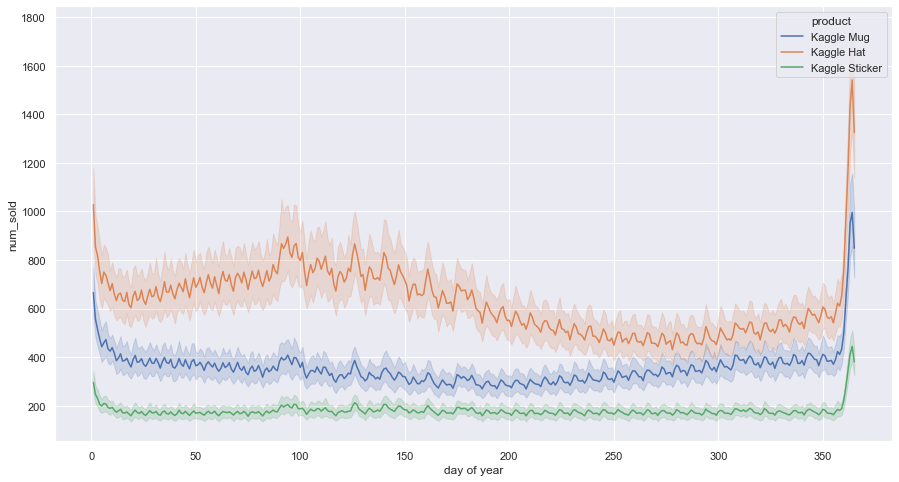

In [18]:
sns.lineplot(df['day of year'], df['num_sold'], hue=df['product'])

(array([2.35955056]), array([0.01380712]))

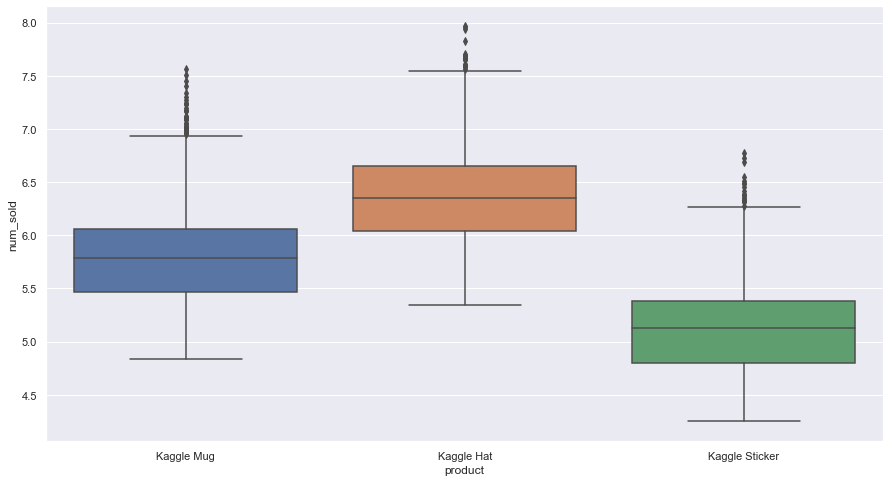

In [19]:
sns.boxplot(x=df['product'], y=np.log(df['num_sold']))
get_classif(df['product'], np.log(df['num_sold']))
#get_mi_reg(df['product'], df['num_sold'])

(array([0.79408583]), array([0.78775023]))

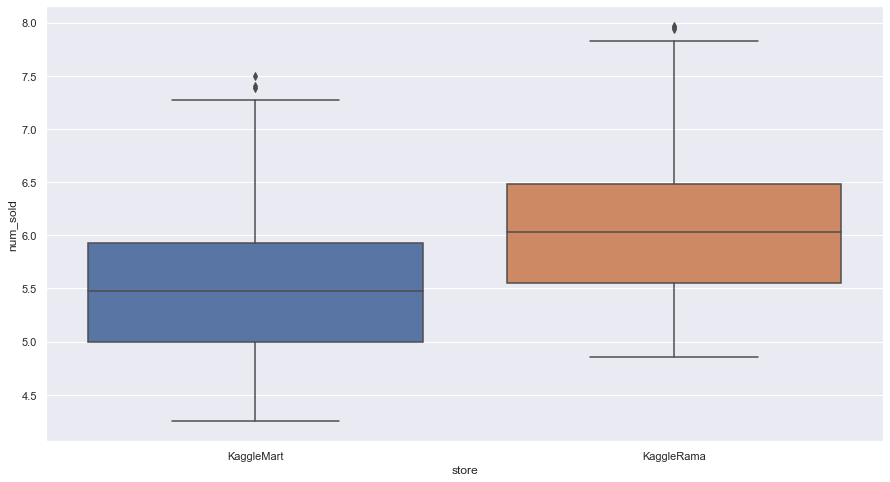

In [20]:
sns.boxplot(x=df['store'], y=np.log(df['num_sold']))
#get_mi_reg(df['store'], df['num_sold'])
get_classif(df['store'], np.log(df['num_sold']))

(array([0.84146528]), array([0.73111368]))

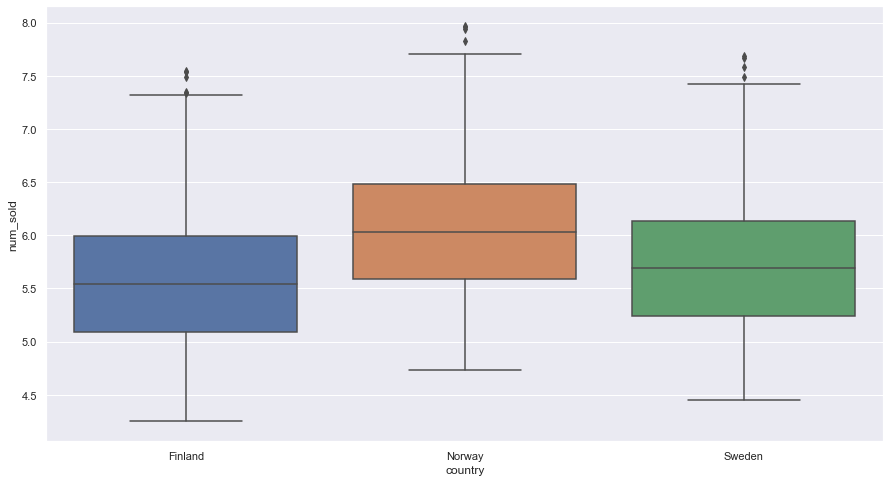

In [21]:
sns.boxplot(x=df['country'], y=np.log(df['num_sold']))
get_classif(df['country'], np.log(df['num_sold']))
#get_mi_reg(df['country'], df['num_sold'])

/usr/local/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
/usr/local/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


(array([nan]), array([nan]))

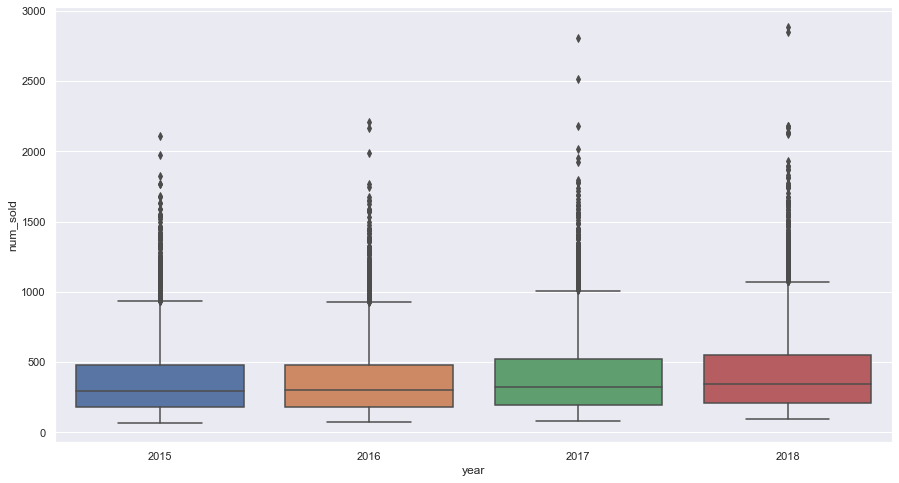

In [22]:
sns.boxplot(x=df['year'], y=df['num_sold'])
get_classif(df['year'], df['num_sold'])
#get_mi_reg(df['year'], df['num_sold'])

(array([0.58528835]), array([0.96451877]))

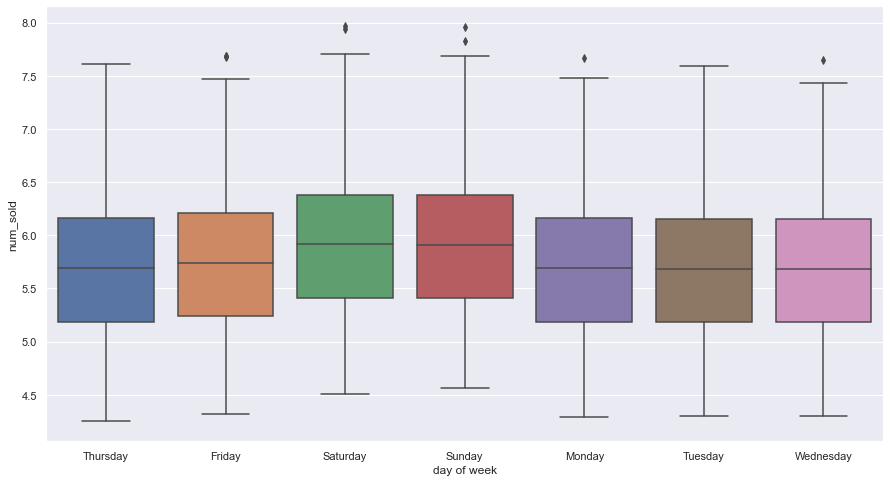

In [23]:
sns.boxplot(x=df['day of week'], y=np.log(df['num_sold']))
get_classif(df['day of week'], np.log(df['num_sold']))
#get_mi_reg(df['day of week'], df['num_sold'])

/usr/local/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
/usr/local/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


(array([nan]), array([nan]))

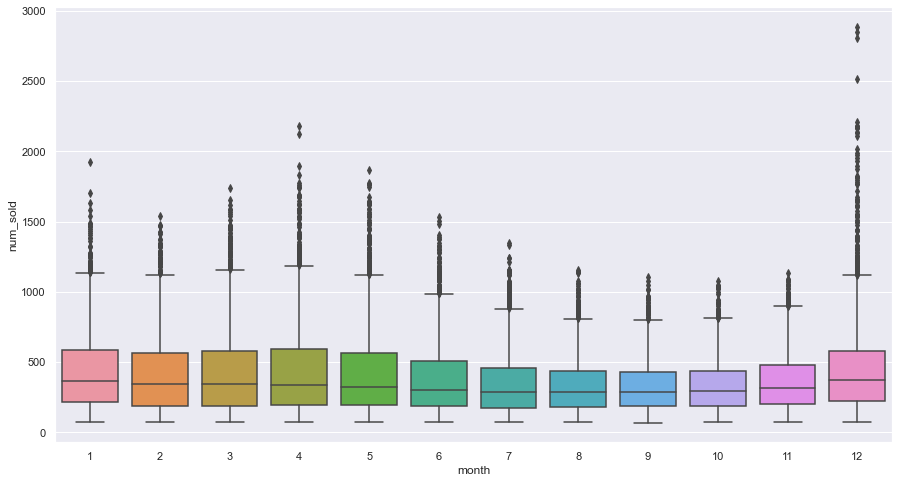

In [24]:
sns.boxplot(x=df['month'], y=df['num_sold'])
get_classif(df['month'], np.log(df['num_sold']))

In [25]:
df_store = df.groupby(['store']).agg('mean')
print(df_store)

                  row_id    num_sold     month    year  day of year
store                                                              
KaggleMart  13150.032877  282.566895  6.524658  2016.5        183.0
KaggleRama  13153.032877  492.523212  6.524658  2016.5        183.0


<BarContainer object of 2 artists>

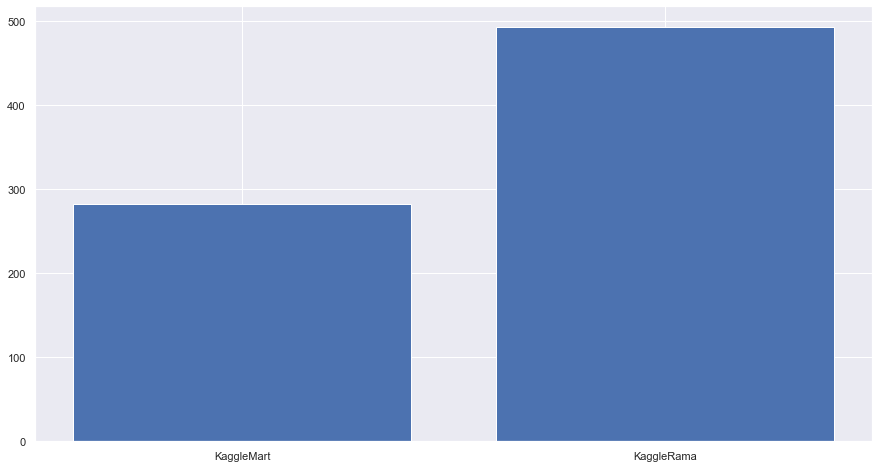

In [26]:
plt.bar(df_store.index, df_store['num_sold'])

# Mutual Information

In [27]:
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression

In [28]:
df_encode = pd.get_dummies(df, columns=['country', 'store', 'product', 'day of week'])
df_encode.columns

Index(['row_id', 'date', 'num_sold', 'month', 'year', 'day of year',
       'country_Finland', 'country_Norway', 'country_Sweden',
       'store_KaggleMart', 'store_KaggleRama', 'product_Kaggle Hat',
       'product_Kaggle Mug', 'product_Kaggle Sticker', 'day of week_Friday',
       'day of week_Monday', 'day of week_Saturday', 'day of week_Sunday',
       'day of week_Thursday', 'day of week_Tuesday', 'day of week_Wednesday'],
      dtype='object')

In [29]:
X_encode = df_encode.drop(columns=['date', 'num_sold', 'row_id'])
y_encode = df_encode['num_sold']

In [30]:
mi_values = mutual_info_regression(X_encode, y_encode, discrete_features=True)

In [31]:
mi_dict = {}

for i in range(len(X_encode.columns)):
    mi_dict[X_encode.columns[i]] = mi_values[i]
    

In [32]:
mi_dict

{'month': 0.03696907022014928,
 'year': 0.02608794388059943,
 'day of year': 0.0,
 'country_Finland': 0.04396614921791597,
 'country_Norway': 0.08681048644760891,
 'country_Sweden': 0.03870767615791881,
 'store_KaggleMart': 0.13194042509419113,
 'store_KaggleRama': 0.13194042509419113,
 'product_Kaggle Hat': 0.2899091328813599,
 'product_Kaggle Mug': 0.11059024912169968,
 'product_Kaggle Sticker': 0.3394154643366334,
 'day of week_Friday': 0.0,
 'day of week_Monday': 0.0038377787903767224,
 'day of week_Saturday': 0.015472324170580753,
 'day of week_Sunday': 0.015846048078660635,
 'day of week_Thursday': 0.00056120074461119,
 'day of week_Tuesday': 0.0,
 'day of week_Wednesday': 0.002074203972537658}

In [33]:
df_encode.corr()

,row_id,num_sold,month,year,day of year,country_Finland,country_Norway,country_Sweden,store_KaggleMart,store_KaggleRama,product_Kaggle Hat,product_Kaggle Mug,product_Kaggle Sticker,day of week_Friday,day of week_Monday,day of week_Saturday,day of week_Sunday,day of week_Thursday,day of week_Tuesday,day of week_Wednesday
row_id,1.000000e+00,0.068258,2.492972e-01,9.682461e-01,2.499971e-01,-5.587353e-04,-2.736134e-18,5.587353e-04,-1.975427e-04,1.975427e-04,-1.933663e-20,-9.312254e-05,9.312254e-05,9.074134e-06,1.774579e-03,-1.632560e-04,8.056616e-04,-2.101091e-03,-6.459052e-04,3.203055e-04
num_sold,6.825826e-02,1.000000,-7.573232e-02,8.952721e-02,-7.400744e-02,-2.171257e-01,3.054870e-01,-8.836132e-02,-3.945467e-01,3.945467e-01,6.412028e-01,-8.808009e-02,-5.531227e-01,-1.241092e-02,-4.556801e-02,9.640020e-02,9.390114e-02,-4.054621e-02,-4.694606e-02,-4.503856e-02
month,2.492972e-01,-0.075732,1.000000e+00,1.776099e-04,9.965049e-01,5.165146e-18,-2.733267e-18,-8.729825e-19,0.000000e+00,0.000000e+00,6.287552e-18,6.287552e-18,6.297945e-18,4.949662e-04,-3.205420e-03,2.464453e-03,1.965038e-04,1.897466e-03,-2.913763e-03,1.063088e-03
year,9.682461e-01,0.089527,1.776099e-04,1.000000e+00,0.000000e+00,-1.167072e-17,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.086679e-16,2.623823e-03,-8.746075e-04,8.746075e-04,-2.623823e-03,9.768438e-17,-9.638711e-17
day of year,2.499971e-01,-0.074007,9.965049e-01,0.000000e+00,1.000000e+00,-1.251983e-18,7.076424e-19,-2.852343e-18,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.719594e-05,-3.062538e-03,2.728443e-03,-1.670475e-04,1.763280e-03,-2.585118e-03,1.283260e-03
country_Finland,-5.587353e-04,-0.217126,5.165146e-18,-1.167072e-17,-1.251983e-18,1.000000e+00,-5.000000e-01,-5.000000e-01,-4.480857e-20,4.480857e-20,0.000000e+00,0.000000e+00,0.000000e+00,4.271867e-17,-2.128950e-17,-2.133748e-17,-2.131189e-17,-2.128630e-17,4.271867e-17,4.271867e-17
country_Norway,-2.736134e-18,0.305487,-2.733267e-18,0.000000e+00,7.076424e-19,-5.000000e-01,1.000000e+00,-5.000000e-01,-4.480857e-20,4.480857e-20,0.000000e+00,0.000000e+00,0.000000e+00,6.730378e-20,0.000000e+00,5.437523e-20,-2.238980e-20,3.198543e-21,1.314026e-19,4.166424e-20
country_Sweden,5.587353e-04,-0.088361,-8.729825e-19,0.000000e+00,-2.852343e-18,-5.000000e-01,-5.000000e-01,1.000000e+00,-3.584686e-20,3.584686e-20,0.000000e+00,0.000000e+00,0.000000e+00,4.243984e-17,-2.134068e-17,-2.129590e-17,-2.137266e-17,-2.134708e-17,4.256804e-17,4.238856e-17
store_KaggleMart,-1.975427e-04,-0.394547,0.000000e+00,0.000000e+00,0.000000e+00,-4.480857e-20,-4.480857e-20,-3.584686e-20,1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-3.021648e-20,2.412492e-20,2.412492e-20,2.412492e-20,2.412492e-20,-3.021648e-20,-3.021648e-20
store_KaggleRama,1.975427e-04,0.394547,0.000000e+00,0.000000e+00,0.000000e+00,4.480857e-20,4.480857e-20,3.584686e-20,-1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.021648e-20,-2.412492e-20,-2.412492e-20,-2.412492e-20,-2.412492e-20,3.021648e-20,3.021648e-20


<AxesSubplot:>

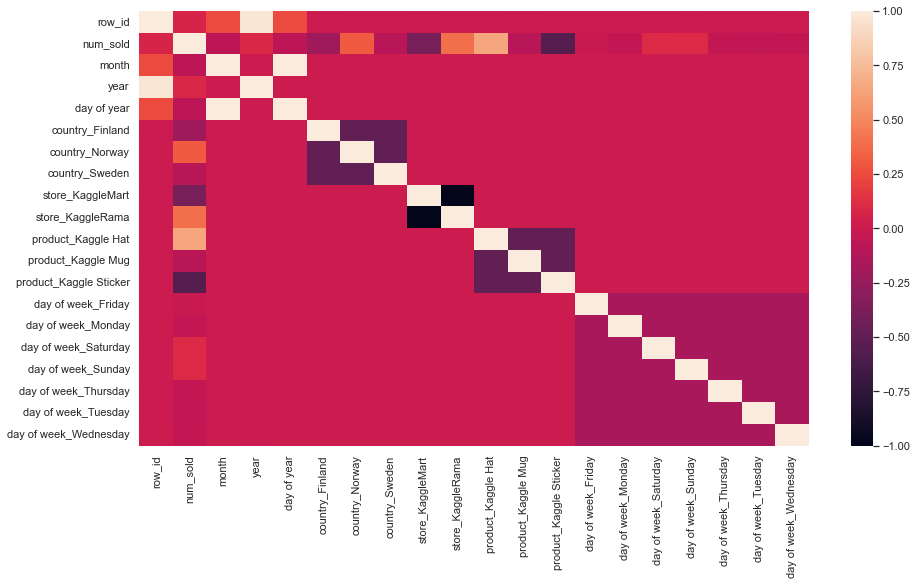

In [34]:
sns.heatmap(df_encode.corr())

In [35]:
features = ['store_KaggleMart',
            'store_KaggleRama',
            'product_Kaggle Hat',
            'product_Kaggle Mug',
            'product_Kaggle Sticker',
            'country_Norway',
            'num_sold']

df_train_final = df_encode

In [36]:
features = ['row_id',
            'store_KaggleMart',
            'store_KaggleRama',
            'product_Kaggle Hat',
            'product_Kaggle Mug',
            'product_Kaggle Sticker',
            'country_Norway',]

df_test_encode = get_features(df_test)
df_test_final = df_test_encode

In [37]:
df_train_final.to_csv('Final Train.csv', index=False)
df_test_final.to_csv('Final Test.csv', index=False)